In [6]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
import seaborn as sns
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from images_segmentation import otsu as ot
from images_segmentation import dicescore as dsc
from PIL import Image
import os
import os.path


Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def binarize(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [8]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [9]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/")
for f in os.listdir(path):
    img_N2DH_GOWT1.append(imread(os.path.join(path , f)))


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/")
for f in os.listdir(path):
    gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

In [10]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img/")
for f in os.listdir(path):
    img_N2DL_HeLa.append(imread(os.path.join(path , f)))


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt/")
for f in os.listdir(path):
    gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

In [11]:
# Load raw images of NIH3T3-dataset

img_NIH3T3 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/")
for f in os.listdir(path):
    img_NIH3T3.append(imread(os.path.join(path , f)))

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/")
for f in os.listdir(path):
    gt_NIH3T3.append(imread(os.path.join(path , f)))

In [12]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1 = []
for i in range(0,len(gt_N2DH_GOWT1)):
    binary_gt_N2DH_GOWT1.append(binarize(gt_N2DH_GOWT1[i])) 


binary_gt_N2DL_HeLa = []
for i in range(0,len(gt_N2DL_HeLa)):
    binary_gt_N2DL_HeLa.append(binarize(gt_N2DL_HeLa[i])) 

In [13]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

copy_img_NIH3T3 = img_NIH3T3.copy()


In [14]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(copy_img_N2DH_GOWT1[i] , 5))


median_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(copy_img_N2DL_HeLa[i] , 5))


median_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 5))


In [15]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1[i] , 5))


gauss_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa[i] , 5))


gauss_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 5))


In [16]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    stretch_img_N2DH_GOWT1.append(stretch(copy_img_N2DH_GOWT1[i]))


stretch_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    stretch_img_N2DL_HeLa.append(stretch(copy_img_N2DL_HeLa[i]))


stretch_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    stretch_img_NIH3T3.append(stretch(copy_img_NIH3T3[i]))


In [17]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(median_img_N2DH_GOWT1)):
    median_stretch_img_N2DH_GOWT1.append(stretch(median_img_N2DH_GOWT1[i]))


median_stretch_img_N2DL_HeLa = []
for i in range(0,len(median_img_N2DL_HeLa)):
    median_stretch_img_N2DL_HeLa.append(stretch(median_img_N2DL_HeLa[i]))


median_stretch_img_NIH3T3 = []
for i in range(0,len(median_img_NIH3T3)):
    median_stretch_img_NIH3T3.append(stretch(median_img_NIH3T3[i]))


In [18]:
# Apply histogram stretching and median filter to all images of each dataset

stretch_median_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_img_N2DH_GOWT1)):
    stretch_median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1[i] , 5))


stretch_median_img_N2DL_HeLa = []
for i in range(0,len(stretch_img_N2DL_HeLa)):
    stretch_median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(stretch_img_N2DL_HeLa[i] , 5))


stretch_median_img_NIH3T3 = []
for i in range(0,len(stretch_img_NIH3T3)):
    stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 5))


In [19]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(gauss_img_N2DH_GOWT1)):
    gauss_stretch_img_N2DH_GOWT1.append(stretch(gauss_img_N2DH_GOWT1[i]))


gauss_stretch_img_N2DL_HeLa = []
for i in range(0,len(gauss_img_N2DL_HeLa)):
    gauss_stretch_img_N2DL_HeLa.append(stretch(gauss_img_N2DL_HeLa[i]))


gauss_stretch_img_NIH3T3 = []
for i in range(0,len(gauss_img_NIH3T3)):
    gauss_stretch_img_NIH3T3.append(stretch(gauss_img_NIH3T3[i]))


In [20]:
# Apply histogram stretching and gaussian filter to all images of each dataset

stretch_gauss_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_img_N2DH_GOWT1)):
    stretch_gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1[i] , 5))


stretch_gauss_img_N2DL_HeLa = []
for i in range(0,len(stretch_img_N2DL_HeLa)):
    stretch_gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa[i] , 5))


stretch_gauss_img_NIH3T3 = []
for i in range(0,len(stretch_img_NIH3T3)):
    stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 5))


In [21]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    otsu_img_N2DH_GOWT1.append(ot.otsu_thresholding(copy_img_N2DH_GOWT1[i] , 256))

otsu_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    otsu_img_N2DL_HeLa.append(ot.otsu_thresholding(copy_img_N2DL_HeLa[i] , 256))

otsu_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    otsu_img_NIH3T3.append(ot.otsu_thresholding(copy_img_NIH3T3[i] , 256))


In [22]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1 = []
for i in range(0,len(median_img_N2DH_GOWT1)):
    otsu_median_img_N2DH_GOWT1.append(ot.otsu_thresholding(median_img_N2DH_GOWT1[i] , 256))

otsu_median_img_N2DL_HeLa = []
for i in range(0,len(median_img_N2DL_HeLa)):
    otsu_median_img_N2DL_HeLa.append(ot.otsu_thresholding(median_img_N2DL_HeLa[i] , 256))

otsu_median_img_NIH3T3 = []
for i in range(0,len(median_img_NIH3T3)):
    otsu_median_img_NIH3T3.append(ot.otsu_thresholding(median_img_NIH3T3[i] , 256))


In [23]:
# Apply otsu thresholding to all images of each dataset - gaussian filter

otsu_gauss_img_N2DH_GOWT1 = []
for i in range(0,len(gauss_img_N2DH_GOWT1)):
    otsu_gauss_img_N2DH_GOWT1.append(ot.otsu_thresholding(gauss_img_N2DH_GOWT1[i] , 256))

otsu_gauss_img_N2DL_HeLa = []
for i in range(0,len(gauss_img_N2DL_HeLa)):
    otsu_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_img_N2DL_HeLa[i] , 256))

otsu_gauss_img_NIH3T3 = []
for i in range(0,len(gauss_img_NIH3T3)):
    otsu_gauss_img_NIH3T3.append(ot.otsu_thresholding(gauss_img_NIH3T3[i] , 256))



In [24]:
# Apply otsu thresholding to all images of each dataset - histogram stretching

otsu_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_img_N2DH_GOWT1)):
    otsu_stretch_img_N2DH_GOWT1.append(ot.otsu_thresholding(stretch_img_N2DH_GOWT1[i] , 256))

otsu_stretch_img_N2DL_HeLa = []
for i in range(0,len(stretch_img_N2DL_HeLa)):
    otsu_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_img_N2DL_HeLa[i] , 256))

otsu_stretch_img_NIH3T3 = []
for i in range(0,len(stretch_img_NIH3T3)):
    otsu_stretch_img_NIH3T3.append(ot.otsu_thresholding(stretch_img_NIH3T3[i] , 256))


In [25]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(median_stretch_img_N2DH_GOWT1)):
    otsu_median_stretch_img_N2DH_GOWT1.append(ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1[i] , 256))

otsu_median_stretch_img_N2DL_HeLa = []
for i in range(0,len(median_stretch_img_N2DL_HeLa)):
    otsu_median_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(median_stretch_img_N2DL_HeLa[i] , 256))

otsu_median_stretch_img_NIH3T3 = []
for i in range(0,len(median_stretch_img_NIH3T3)):
    otsu_median_stretch_img_NIH3T3.append(ot.otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))
    


In [26]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and median filter

otsu_stretch_median_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_median_img_N2DH_GOWT1)):
    otsu_stretch_median_img_N2DH_GOWT1.append(ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1[i] , 256))

otsu_stretch_median_img_N2DL_HeLa = []
for i in range(0,len(stretch_median_img_N2DL_HeLa)):
    otsu_stretch_median_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_median_img_N2DL_HeLa[i] , 256))

otsu_stretch_median_img_NIH3T3 = []
for i in range(0,len(stretch_median_img_NIH3T3)):
    otsu_stretch_median_img_NIH3T3.append(ot.otsu_thresholding(stretch_median_img_NIH3T3[i] , 256))


In [27]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(gauss_stretch_img_N2DH_GOWT1)):
    otsu_gauss_stretch_img_N2DH_GOWT1.append(ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1[i] , 256))

otsu_gauss_stretch_img_N2DL_HeLa = []
for i in range(0,len(gauss_stretch_img_N2DL_HeLa)):
    otsu_gauss_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa[i] , 256))

otsu_gauss_stretch_img_NIH3T3 = []
for i in range(0,len(gauss_stretch_img_NIH3T3)):
    otsu_gauss_stretch_img_NIH3T3.append(ot.otsu_thresholding(gauss_stretch_img_NIH3T3[i] , 256))


In [28]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and gaussian filter

otsu_stretch_gauss_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_gauss_img_N2DH_GOWT1)):
    otsu_stretch_gauss_img_N2DH_GOWT1.append(ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1[i] , 256))

otsu_stretch_gauss_img_N2DL_HeLa = []
for i in range(0,len(stretch_gauss_img_N2DL_HeLa)):
    otsu_stretch_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa[i] , 256))

otsu_stretch_gauss_img_NIH3T3 = []
for i in range(0,len(stretch_gauss_img_NIH3T3)):
    otsu_stretch_gauss_img_NIH3T3.append(ot.otsu_thresholding(stretch_gauss_img_NIH3T3[i] , 256))


In [29]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

dice_otsu_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_img_N2DH_GOWT1)):
    dice_otsu_img_N2DH_GOWT1.append(dsc.dice(otsu_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_img_N2DH_GOWT1)

[0.03800150856650264, 0.44457954188892373, 0.09436129788960387, 0.0158551334515151, 0.3895660030838432, 0.13068034697048161]


In [30]:
# Dice score - N2DH-GOWT1-dataset
## median filter

dice_otsu_median_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_median_img_N2DH_GOWT1)):
    dice_otsu_median_img_N2DH_GOWT1.append(dsc.dice(otsu_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_median_img_N2DH_GOWT1)


[0.03939029767514244, 0.4677060983168836, 0.1035249235425797, 0.011756169543205146, 0.40327507294746806, 0.1310577222040151]


In [31]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

dice_otsu_gauss_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_gauss_img_N2DH_GOWT1)):
    dice_otsu_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_gauss_img_N2DH_GOWT1)


[0.04510272336359293, 0.5051404384196458, 0.11590855562562205, 0.010514828297633366, 0.4386785365487191, 0.14702220630955384]


In [32]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

dice_otsu_stretch_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_stretch_img_N2DH_GOWT1)):
    dice_otsu_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_stretch_img_N2DH_GOWT1)


[0.059799022144639176, 0.5349715323326517, 0.1436872402313424, 0.040327588600150496, 0.516637566315224, 0.14751865450669194]


In [33]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

dice_otsu_median_stretch_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_median_stretch_img_N2DH_GOWT1)):
    dice_otsu_median_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_median_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_median_stretch_img_N2DH_GOWT1)


[0.05278302663457241, 0.5409087456001891, 0.14571646235888913, 0.04333375942732967, 0.5288235588220589, 0.14234896901000843]


In [34]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and median filter

dice_otsu_stretch_median_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_stretch_median_img_N2DH_GOWT1)):
    dice_otsu_stretch_median_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))


In [35]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

dice_otsu_gauss_stretch_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_gauss_stretch_img_N2DH_GOWT1)):
    dice_otsu_gauss_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_gauss_stretch_img_N2DH_GOWT1)


[0.04661477121701158, 0.561312133024926, 0.15124861265260822, 0.04389898513098891, 0.5602289165197732, 0.16433208062863]


In [36]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and gaussian filter

dice_otsu_stretch_gauss_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_stretch_gauss_img_N2DH_GOWT1)):
    dice_otsu_stretch_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_stretch_gauss_img_N2DH_GOWT1)


[0.06913916101118556, 0.5660295009092746, 0.1595819410069392, 0.04419835834668998, 0.5648538215450889, 0.16577417792368548]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3057/2518043555.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


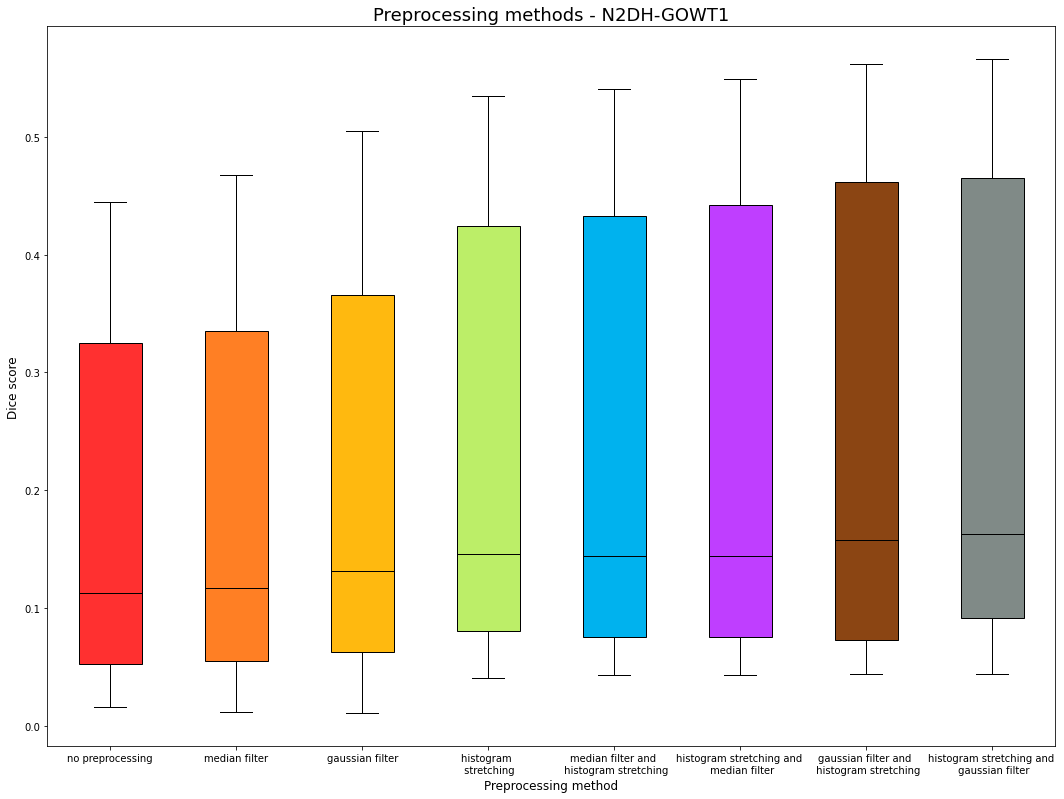

In [37]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - matplotlib

data_N2DH_GOWT1 = [dice_otsu_img_N2DH_GOWT1 , dice_otsu_median_img_N2DH_GOWT1 , dice_otsu_gauss_img_N2DH_GOWT1 , dice_otsu_stretch_img_N2DH_GOWT1 , dice_otsu_median_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_median_img_N2DH_GOWT1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DH_GOWT1, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)



In [38]:
# Dice score - N2DLHeLa-dataset
## no preprocessing

dice_otsu_img_N2DL_HeLa = []
for j in range(0,len(otsu_img_N2DL_HeLa)):
    dice_otsu_img_N2DL_HeLa.append(dsc.dice(otsu_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_img_N2DL_HeLa)



[0.09087354344255885, 0.03418509889824294, 0.05183200094157696, 0.05989965808551387]


In [39]:
# Dice score - N2DLHeLa-dataset
## median filter

dice_otsu_median_img_N2DL_HeLa = []
for j in range(0,len(otsu_median_img_N2DL_HeLa)):
    dice_otsu_median_img_N2DL_HeLa.append(dsc.dice(otsu_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_median_img_N2DL_HeLa)


[0.09080744889415851, 0.03366077153982696, 0.05232072086728215, 0.059910816184862284]


In [40]:
# Dice score - N2DLHeLa-dataset
## gaussian filter

dice_otsu_gauss_img_N2DL_HeLa = []
for j in range(0,len(otsu_gauss_img_N2DL_HeLa)):
    dice_otsu_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_gauss_img_N2DL_HeLa)


[0.09372718676354586, 0.04525594985029263, 0.06705455683982571, 0.0632546305942733]


In [41]:
# Dice score - N2DLHeLa-dataset
## histogram stretching

dice_otsu_stretch_img_N2DL_HeLa = []
for j in range(0,len(otsu_stretch_img_N2DL_HeLa)):
    dice_otsu_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_stretch_img_N2DL_HeLa)


[0.09209020668145133, 0.04439214266316647, 0.07394269419727213, 0.06014806027353508]


In [42]:
# Dice score - N2DLHeLa-dataset
## median filter and histogram stretching

dice_otsu_median_stretch_img_N2DL_HeLa = []
for j in range(0,len(otsu_median_stretch_img_N2DL_HeLa)):
    dice_otsu_median_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_median_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_median_stretch_img_N2DL_HeLa)


[0.09186254954932209, 0.04411338525629415, 0.07307278902790318, 0.060527183241074374]


In [43]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and median filter 

dice_otsu_stretch_median_img_N2DL_HeLa = []
for j in range(0,len(otsu_stretch_median_img_N2DL_HeLa)):
    dice_otsu_stretch_median_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_stretch_median_img_N2DL_HeLa)



[0.09150107343080696, 0.04377914644260445, 0.07230057464827562, 0.06046482332934434]


In [44]:
# Dice score - N2DLHeLa-dataset
## gaussian filter and histogram stretching

dice_otsu_gauss_stretch_img_N2DL_HeLa = []
for j in range(0,len(otsu_gauss_stretch_img_N2DL_HeLa)):
    dice_otsu_gauss_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_gauss_stretch_img_N2DL_HeLa)


[0.09623895346407292, 0.064320425110237, 0.09638223270694307, 0.06395910965240069]


In [45]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and gaussian filter 

dice_otsu_stretch_gauss_img_N2DL_HeLa = []
for j in range(0,len(otsu_stretch_gauss_img_N2DL_HeLa)):
    dice_otsu_stretch_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_stretch_gauss_img_N2DL_HeLa)


[0.09656683103115223, 0.05867756659649983, 0.09776852871310289, 0.06366345347215431]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3057/4203348270.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


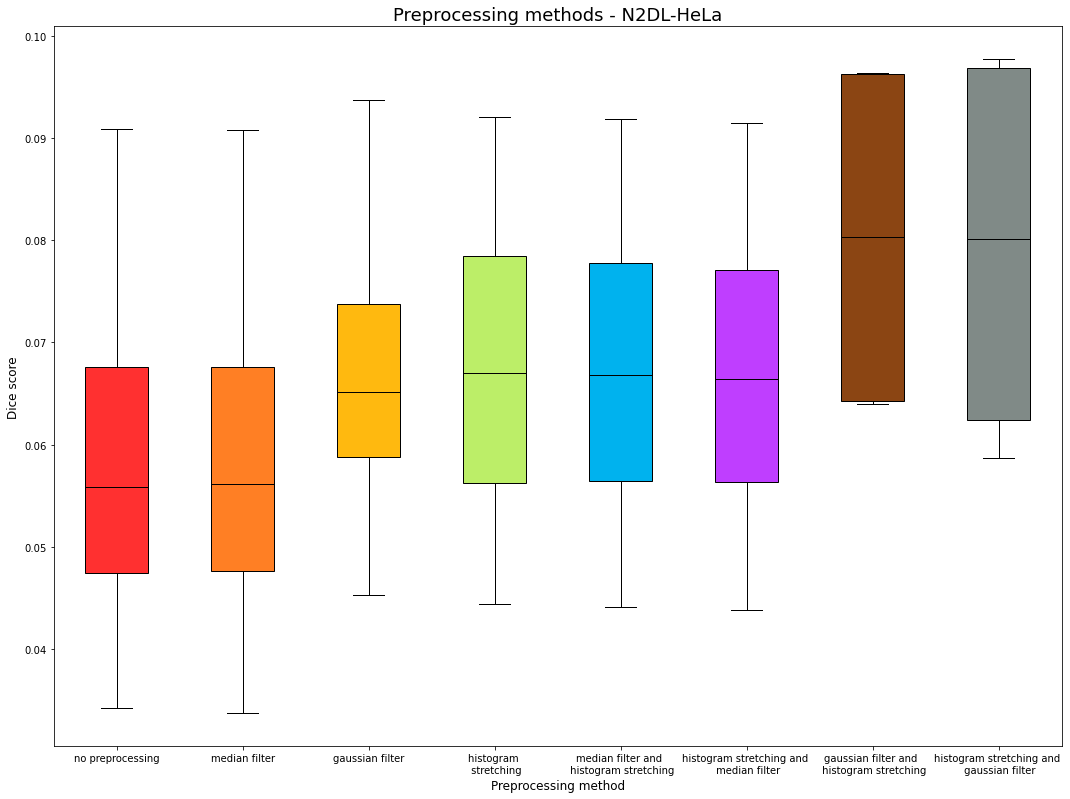

In [46]:
# Dice score - preprocessing - N2DLHeLa-dataset - boxplot

data_N2DLHeLa = [dice_otsu_img_N2DL_HeLa , dice_otsu_median_img_N2DL_HeLa , dice_otsu_gauss_img_N2DL_HeLa , dice_otsu_stretch_img_N2DL_HeLa , dice_otsu_median_stretch_img_N2DL_HeLa , dice_otsu_stretch_median_img_N2DL_HeLa , dice_otsu_gauss_stretch_img_N2DL_HeLa , dice_otsu_stretch_gauss_img_N2DL_HeLa]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DLHeLa, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

In [47]:
# Dice score - NIH3T3-dataset
## no preprocessing

dice_otsu_img_NIH3T3 = []
for j in range(0,len(otsu_img_NIH3T3)):
    dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_img_NIH3T3)


[0.1318754286881777, 0.20982971429730524, 0.15785854858781567, 0.21840428909509732, 0.17016498516320475, 0.24189921030347192, 0.20527928745977272, 0.11001995446704269, 0.007183655669091504, 0.026147481744167072, 0.052479285553083795, 0.1539208663663846, 0.25963565435926933, 0.20469011949051222, 0.03193659213761119, 0.1792060558360821, 0.17025486523898706, 0.12622923471358832]


In [48]:
# Dice score - N2DLHeLa-dataset
## median filter

dice_otsu_median_img_NIH3T3 = []
for j in range(0,len(otsu_median_img_NIH3T3)):
    dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_median_img_NIH3T3)


[0.13173565325235503, 0.19172519775410943, 0.14984889909339455, 0.21851838510099872, 0.16266151430986595, 0.2418734639255313, 0.20516404296012947, 0.106212117056581, 0.00675921435499515, 0.025306991354915757, 0.04928616525121688, 0.15367582649320313, 0.25222802663534766, 0.20245988678835108, 0.0318803594491136, 0.17918742813338445, 0.17685445184867996, 0.10898224644049921]


In [49]:
# Dice score - NIH3T3-dataset
## gaussian filter

dice_otsu_gauss_img_NIH3T3 = []
for j in range(0,len(otsu_gauss_img_NIH3T3)):
    dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_gauss_img_NIH3T3)


[0.13519572215659575, 0.20554802559874802, 0.16209812749033436, 0.2212173231537206, 0.15783018914019634, 0.2448275194173817, 0.20963258458747452, 0.10837674130300032, 0.007249687591717928, 0.028767373952666046, 0.04626176303504829, 0.16581036983651193, 0.25982990661417577, 0.2041903847027592, 0.031350507174666004, 0.18349254692552291, 0.17520833414956177, 0.12650648855718544]


In [50]:
# Dice score - NIH3T3-dataset
## histogram stretching

dice_otsu_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_stretch_img_NIH3T3)):
    dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_stretch_img_NIH3T3)


[0.13628263523877512, 0.21432275691093416, 0.17623693414962827, 0.21840428909509732, 0.271007800768266, 0.24811822570705944, 0.20527928745977272, 0.1497377579983233, 0.18580765485211279, 0.13585772153629933, 0.1684947745636386, 0.18026052502550918, 0.25963565435926933, 0.20469011949051222, 0.16380147167601242, 0.18191954232025004, 0.18317285033891095, 0.14604268351038377]


In [51]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

dice_otsu_median_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
    dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_median_stretch_img_NIH3T3)


[0.13621729730896376, 0.2152951074932762, 0.17521433451612192, 0.21851838510099872, 0.2818519794840378, 0.2476502256578138, 0.20516404296012947, 0.15295446060263893, 0.18614895692394828, 0.13571806586095542, 0.1671404544706678, 0.17920322067706512, 0.26005728672416956, 0.20245988678835108, 0.16353939709277748, 0.18169609609200182, 0.1830120964419637, 0.14597487091772304]


In [52]:
# Dice score - NIH3T3-dataset
## histogram stretching and median filter

dice_otsu_stretch_median_img_NIH3T3 = []
for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
    dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_stretch_median_img_NIH3T3)


[0.13621729730896376, 0.2152951074932762, 0.17521433451612192, 0.21851838510099872, 0.27093539591355054, 0.2476502256578138, 0.20516404296012947, 0.14903536754186555, 0.18614895692394828, 0.13571806586095542, 0.1671404544706678, 0.17920322067706512, 0.26005728672416956, 0.20245988678835108, 0.16353939709277748, 0.18169609609200182, 0.1830120964419637, 0.14597487091772304]


In [53]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

dice_otsu_gauss_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
    dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_gauss_stretch_img_NIH3T3)


[0.13678078823922102, 0.2151177857418258, 0.17664409566193182, 0.22292037391100847, 0.29666027401993816, 0.25368247266328864, 0.21007404047113717, 0.14840100859990893, 0.19087654287694897, 0.13680137345775106, 0.17566441072382993, 0.1878826005179577, 0.2611499273453763, 0.20846629793264818, 0.16780740497337418, 0.18560117302052787, 0.18231884718519026, 0.14804104973060378]


In [54]:
# Dice score - NIH3T3-dataset
## histogram stretching and gaussian filter

dice_otsu_stretch_gauss_img_NIH3T3 = []
for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
    dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_stretch_gauss_img_NIH3T3)


[0.13754986285476928, 0.21501545438423147, 0.1758246189413694, 0.2237821852225364, 0.29714230523125956, 0.2541813634852989, 0.2102359146953173, 0.14946584833957507, 0.19133757210542407, 0.138084459082776, 0.17624220540483693, 0.18951712674233437, 0.26155745834110705, 0.20823133074873867, 0.17071419427019263, 0.18514462579591728, 0.18283437069280953, 0.1477792695019941]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_3057/2182695053.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


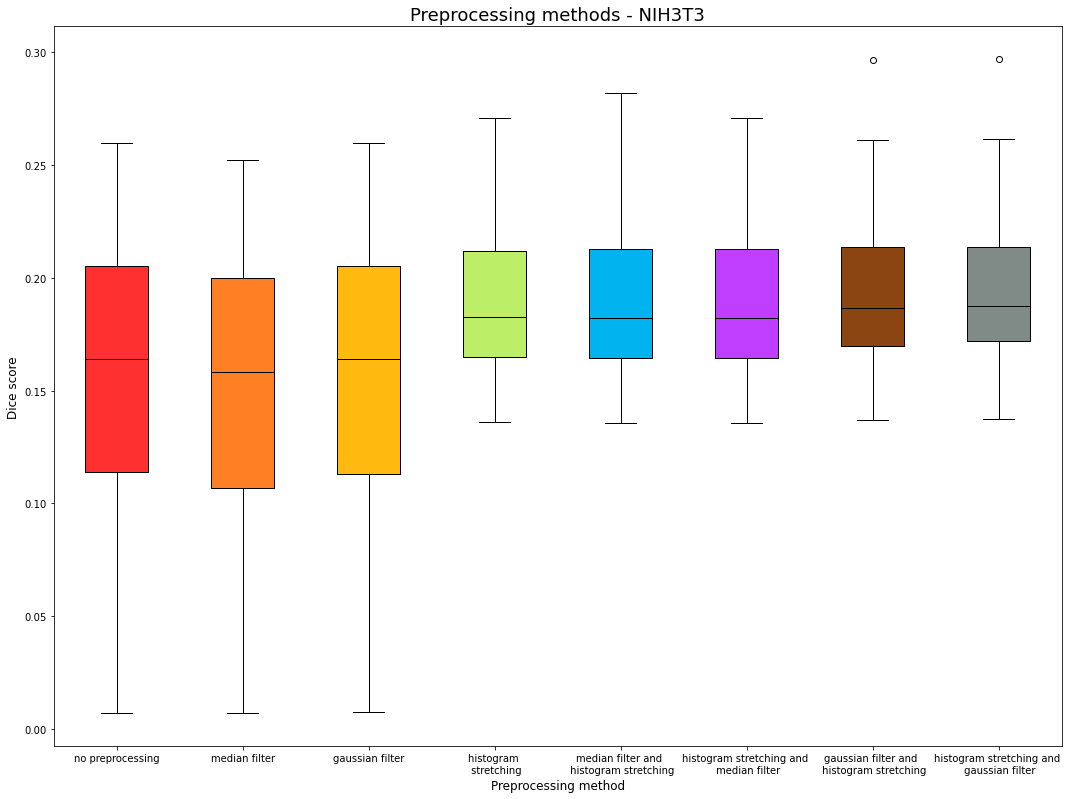

In [55]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3 , dice_otsu_gauss_stretch_img_NIH3T3 , dice_otsu_stretch_gauss_img_NIH3T3]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)